<a href="https://colab.research.google.com/github/kazishuvo22/fastMRI-Reconstruction/blob/master/testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tqdm import tqdm
from itertools import chain
from skimage.io import imread, imshow, imread_collection, concatenate_images
from skimage.transform import resize
from skimage.morphology import label
from tensorflow.keras.models import Model, load_model
from keras.layers import Input
from keras import optimizers
from keras.layers.core import Dropout, Lambda
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K
import tensorflow as tf
import os, glob

In [2]:
model_name = "dataset/unet_v1.h5"
model_name

'dataset/unet_v1.h5'

In [3]:
def batch_ssim(y_true, y_pred):
    return tf.reduce_mean(tf.image.ssim(y_true, y_pred, max_val=1.0))
batch_nmse = tf.keras.metrics.RootMeanSquaredError(name='batch_nmse')
def batch_psnr(y_true, y_pred):
    return tf.reduce_mean(tf.image.psnr(y_true, y_pred, max_val=1.0))
def batch_msssim(y_true, y_pred):
    return tf.reduce_mean(tf.image.ssim_multiscale(y_true, y_pred, max_val=1.0))


In [4]:
TEST_DIR_PATH  = "dataset/testNpyFromTrain/ft"

In [5]:
TEST_IMAGES_DIR_PATH  = glob.glob(os.path.join(TEST_DIR_PATH,"*.npy"))
TEST_IMAGES_DIR_PATH[:4] 

['dataset/testNpyFromTrain/ft\\file1002461.npy',
 'dataset/testNpyFromTrain/ft\\file1002469.npy',
 'dataset/testNpyFromTrain/ft\\file1002475.npy',
 'dataset/testNpyFromTrain/ft\\file1002476.npy']

In [6]:
len(TEST_IMAGES_DIR_PATH)

15

##Load the model

In [22]:
model = load_model(model_name, custom_objects={'batch_ssim':batch_ssim,'batch_psnr':batch_psnr,'batch_msssim':batch_msssim,'batch_nmse':batch_nmse})

In [24]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 320, 320, 1) 0                                            
__________________________________________________________________________________________________
conv2d_28 (Conv2D)              (None, 320, 320, 64) 640         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_31 (BatchNo (None, 320, 320, 64) 256         conv2d_28[0][0]                  
__________________________________________________________________________________________________
conv2d_29 (Conv2D)              (None, 320, 320, 64) 36928       batch_normalization_31[0][0]     
____________________________________________________________________________________________

In [25]:
def predict(img_3d):
    
    recon = []
    # Make it 4D for inference
    #img_3d = np.moveaxis(img_3d, 0, 2) # whc
    
    slices = img_3d.shape[0]

    # iterate over each slice and save
    for i in range(slices):
        img = img_3d[i,:,:]
        #img = s.normalize(img) # Normalize image
        img =  img[np.newaxis,:,:,np.newaxis]
        img = model.predict(img)
        img = np.squeeze(img, axis=0)
        img = np.reshape(img, (320, 320))
        recon.append(img)
    
    recon = np.array(recon)
    return recon
 

def show_slices(data, slice_nums, cmap=None):
    fig = plt.figure(figsize=(16, 16))
    for i, num in enumerate(slice_nums):
        plt.subplot(1, len(slice_nums), i + 1)
        plt.imshow(data[num], cmap=cmap)

In [26]:
#test_images = [os.path.join(TEST_IMAGES_DIR_PATH, x) for x in os.listdir(TEST_IMAGES_DIR_PATH)]
test_images = glob.glob(os.path.join(TEST_DIR_PATH +'/*.npy'))
len(test_images)

15

In [35]:
a = np.load(test_images[3])
a.shape

(30, 320, 320)

In [36]:
out_3d = predict(a)
out_3d.shape

(30, 320, 320)

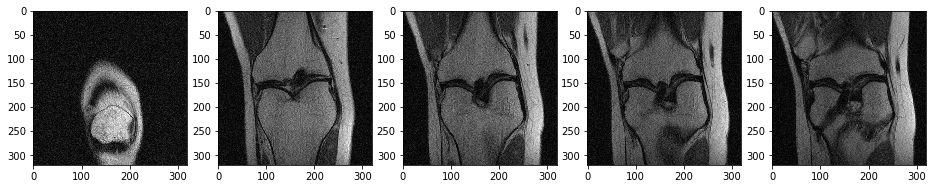

In [37]:
slice_num = [5, 16, 18, 19, 20]
n = 5
show_slices(a, slice_num, cmap='gray')

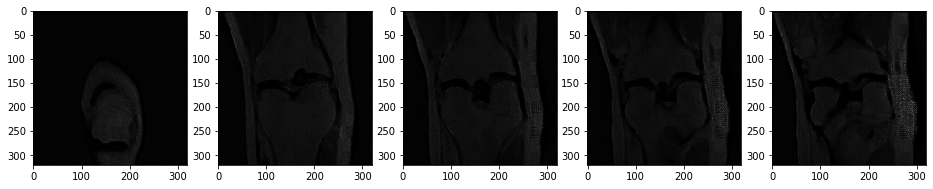

In [38]:
show_slices(out_3d, slice_num, cmap='gray')